In [9]:
# 1. Data Cleaning
# 2. EDA
# 3. Data Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [10]:
import numpy as np
import pandas as pd

In [11]:
data = pd.read_excel("sms spam.xlsx")

In [12]:
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
data['v1']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [14]:
data.shape

(5572, 5)

In [15]:
# 1.Data cleaning

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [17]:
# Drop last three columns because it has a lot of null values

In [18]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
# as it is a permanent command therefore we are using inplace= True

In [19]:
data.head(4)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...


In [20]:
#v1 and v2 are not good varibles name telling information, therefore we change the varible name first
data.rename(columns={'v1':'catgry','v2':'msg'},inplace = True)

In [21]:
data.head(4)

,catgry,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...


In [22]:
data.sample(4)

,catgry,msg
3385,ham,Oops - am at my mum's in somerset... Bit far! ...
348,spam,Fancy a shag? I do.Interested? sextextuk.com t...
3490,ham,Ok.
3937,ham,WHEN THE FIRST STRIKE IS A RED ONE. THE BIRD +...


In [23]:
# head gives first 4 rows of the data while sample gives any 4 rows of the data as a sample

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [25]:
data['catgry']=encoder.fit_transform(data['catgry'])

In [26]:
data.sample(3)

,catgry,msg
2524,1,FREE entry into our å£250 weekly comp just sen...
2858,0,Do you know why god created gap between your f...
1416,0,No..few hours before.went to hair cut .


In [27]:
# checking for missing values
data.isnull().sum()

catgry    0
msg       0
dtype: int64

In [28]:
#checking for duplicate values
data.duplicated().sum()

403

In [29]:
# removing duplicates
data = data.drop_duplicates(keep='first')

In [30]:
data.duplicated().sum()

0

In [31]:
data.shape

(5169, 2)

In [32]:
# we are done with data cleaning now we move to data analysis to better understand our data

In [33]:
# 2.EDA

In [34]:
data.head()

,catgry,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
data['catgry'].value_counts()

0    4516
1     653
Name: catgry, dtype: int64

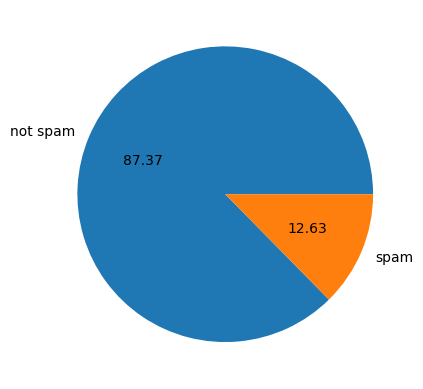

In [36]:
import matplotlib.pyplot as plt
plt.pie(data['catgry'].value_counts(),labels=['not spam','spam'],autopct="%0.2f")
plt.show()

In [37]:
# Using pie chart,data is imbalance

In [38]:
import nltk
# natural language tool kit

In [39]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [40]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jagri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
data['msg']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: msg, Length: 5169, dtype: object

In [42]:
data[1600:1700]

,catgry,msg
1651,0,I wan but too early lei... Me outside now wun ...
1652,1,For ur chance to win a å£250 cash every wk TXT...
1653,0,I was at bugis juz now wat... But now i'm walk...
1655,0,At 7 we will go ok na.
1656,0,Yes I posted a couple of pics on fb. There's s...
...,...,...
1752,0,Give one miss from that number please
1753,0,Jus came back fr lunch wif my sis only. U leh?
1754,0,How is your schedule next week? I am out of to...
1755,0,Really good:)dhanush rocks once again:)


In [43]:
data["msg"] = data["msg"].astype(str)

In [44]:
data['n_char'] = data['msg'].apply(len)

In [45]:
data.head()

,catgry,msg,n_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [46]:
# different words
data['msg'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: msg, Length: 5169, dtype: object

In [47]:
# number of words
data['num_words'] = data['msg'].apply(lambda x:len(nltk.word_tokenize(x)))

In [48]:
data.head()

,catgry,msg,n_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [49]:
data.shape

(5169, 4)

In [50]:
# using sent_tokenize we are breaking sentences into smaller parts and writing the number of parts
data['num_sent'] = data['msg'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [51]:
data.head()

,catgry,msg,n_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [52]:
data[['n_char','num_words','num_sent']].describe()

,n_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.980267,18.453279,1.947185
std,58.239404,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [53]:
# atleast one msg has 910 characters and 220 words, 28 sentences. and on an average a msg has 79 characters, 18 words and 2 sentences.
# Now we are looking for the spam messages like what no of char and words and sentences they have.

In [54]:
# not spam
data[data['catgry']==0][['n_char','num_words','num_sent']].describe()

,n_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.461913,17.120903,1.799601
std,56.362288,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [55]:
# spam
data[data['catgry']==1][['n_char','num_words','num_sent']].describe()

,n_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [56]:
import seaborn as sns

<AxesSubplot:xlabel='n_char', ylabel='Count'>

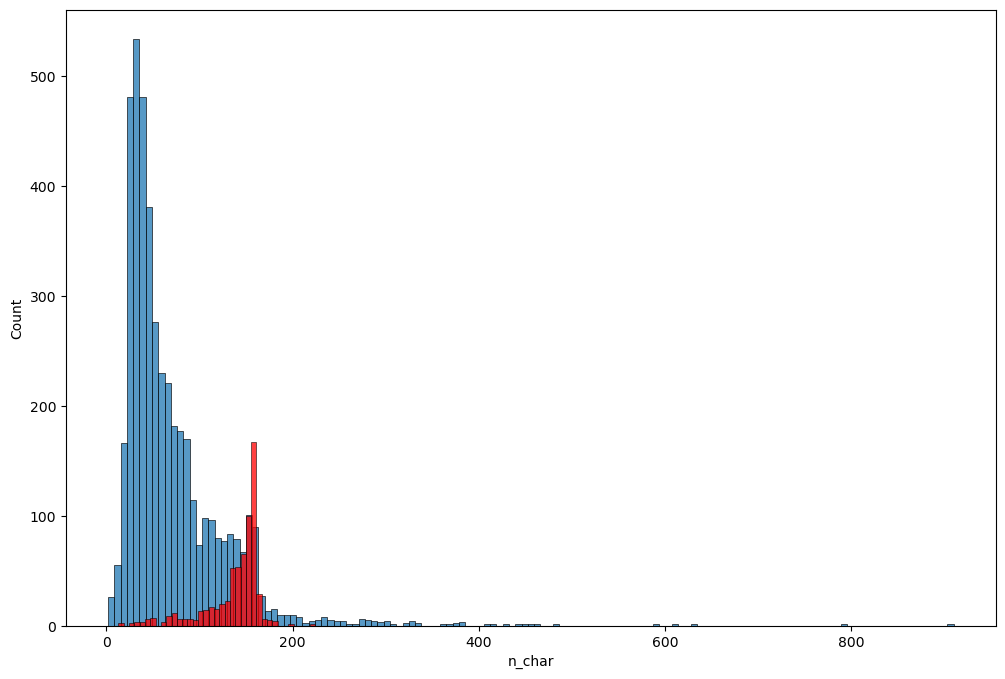

In [57]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['catgry']==0]['n_char'])
sns.histplot(data[data['catgry']==1]['n_char'],color='red')

In [58]:
# spam msgs have lower no of characters on an average and not spam has greater no of words
# But there are outliers too there are some not spam msgs which has very lesser no of words
# And similarly for spams 

<AxesSubplot:xlabel='n_char', ylabel='Count'>

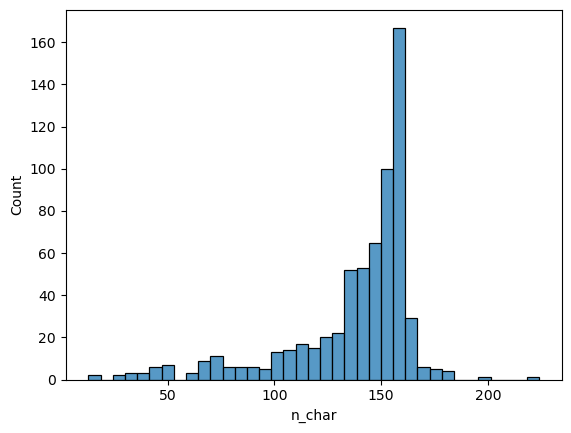

In [59]:
sns.histplot(data[data['catgry']==1]['n_char'])

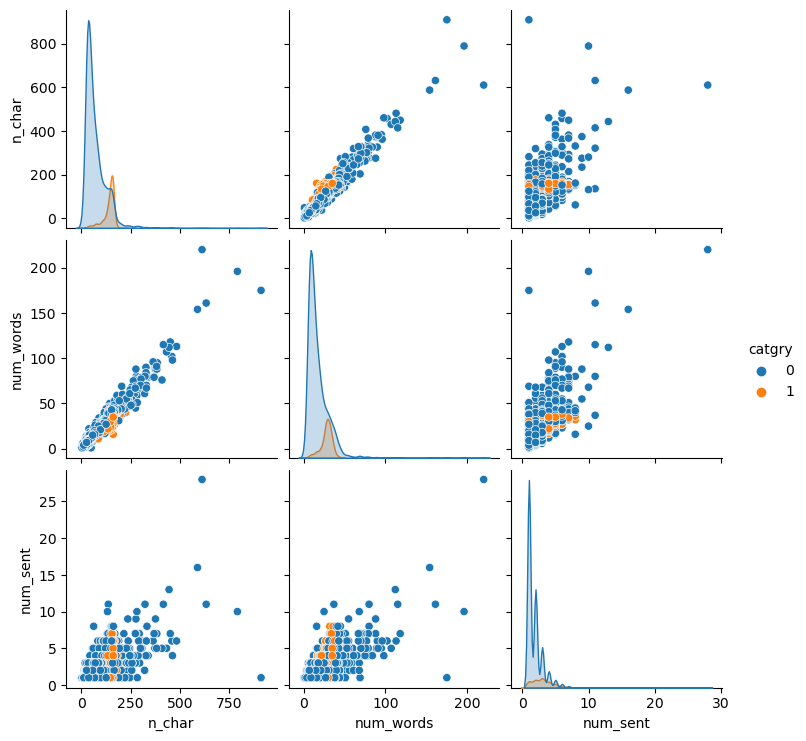

In [60]:
sns.pairplot(data,hue='catgry')

In [61]:
data.corr()

,catgry,n_char,num_words,num_sent
catgry,1.000000,0.384681,0.262984,0.284901
n_char,0.384681,1.000000,0.965784,0.638154
num_words,0.262984,0.965784,1.000000,0.684541
num_sent,0.284901,0.638154,0.684541,1.000000


<AxesSubplot:>

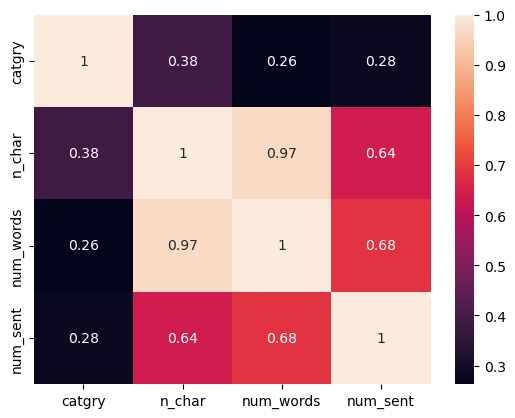

In [62]:
sns.heatmap(data.corr(),annot=True)

In [63]:
## Data Preprocessing
 # Lower Case
 # Tokenization(breaking into sent)
 # Removing special characters()
 # Removing stop words and punctuation(is, am, are and helping verbs)
 # Stemming(remove same type of words like dance dancing danced)

In [64]:
import string
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [65]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jagri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
def transform_msg(msg):
    msg = msg.lower()
    msg = nltk.word_tokenize(msg)
    
    y=[]
    for i in msg:
        if i.isalnum():
            y.append(i)
            
    msg = y[:]
    y.clear()
    
    for i in msg:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    msg = y[:]
    y.clear()
    
    for i in msg:
        y.append(ps.stem(i))
            
    return y

In [67]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [68]:
transform_msg('Hi How are you in %?')

['hi']

In [69]:
transform_msg('Are you working with Jagriti?')

['work', 'jagriti']

In [70]:
transform_msg('Where were you dancing in the rain as i know you like dance very much')

['danc', 'rain', 'know', 'like', 'danc', 'much']

In [71]:
data['transformed_msg'] = data['msg'].apply(transform_msg)

In [72]:
data.head()

,catgry,msg,n_char,num_words,num_sent,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [106]:
pip install wordcloud

     ------------------------------------ 153.3/153.3 kB 653.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [73]:
#Generating word cloud module
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="White")

In [75]:
data["transformed_msg"]=data["transformed_msg"].astype(str)

In [76]:
spam_wc = wc.generate(data[data['catgry'] == 1]['transformed_msg'].str.cat(sep=" "))

In [77]:
notspam_wc = wc.generate(data[data['catgry'] == 0]['transformed_msg'].str.cat(sep=" "))

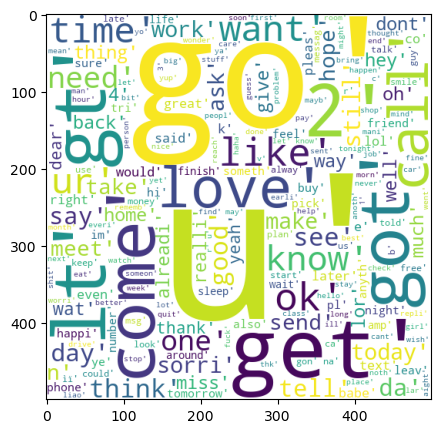

In [78]:
plt.figure(figsize=(20,5))
plt.imshow(spam_wc)

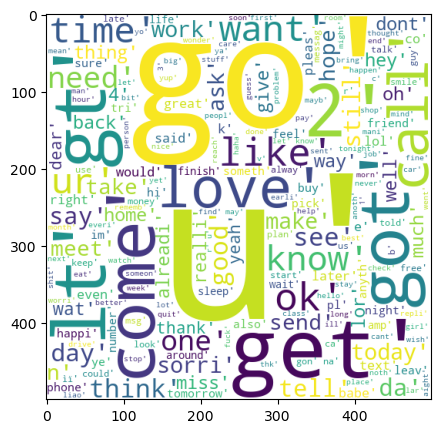

In [79]:
plt.figure(figsize=(20,5))
plt.imshow(notspam_wc)

In [80]:

for msg in data[data['catgry'] == 1]['transformed_msg'].tolist():
    print(msg)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18']
['freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv']
['winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour']
['mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030']
['six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info']
['urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18']
['xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'c

In [81]:
spam_corpus = []
for msg in data[data['catgry'] == 1]['transformed_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [82]:
len(spam_corpus)

9939

C:\Users\jagri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


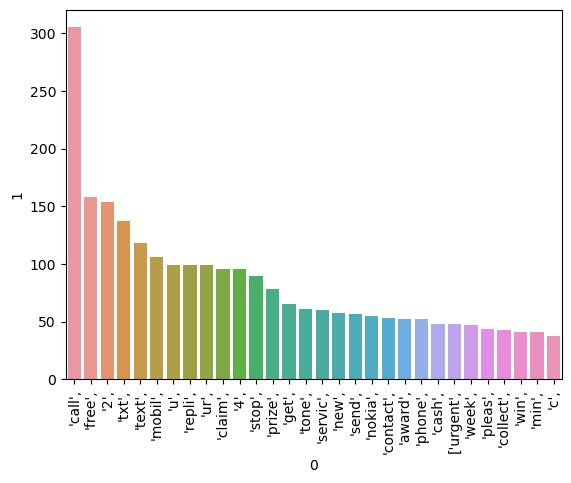

In [83]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [84]:
notspam_corpus = []
for msg in data[data['catgry'] == 0]['transformed_msg'].tolist():
    for word in msg.split():
        notspam_corpus.append(word)

In [85]:
len(notspam_corpus)

35401

C:\Users\jagri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


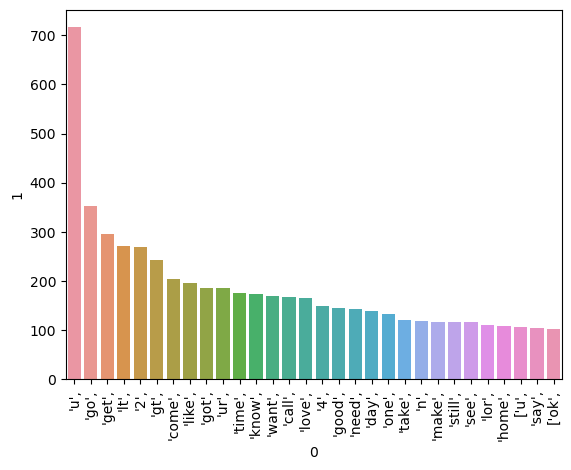

In [86]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(notspam_corpus).most_common(30))[0],pd.DataFrame(Counter(notspam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [87]:
# Text Vectorization
# using Bag of Words
data.head()

,catgry,msg,n_char,num_words,num_sent,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"['go', 'jurong', 'point', 'crazi', 'avail', 'b..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"['ok', 'lar', 'joke', 'wif', 'u', 'oni']"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"['free', 'entri', '2', 'wkli', 'comp', 'win', ..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"['u', 'dun', 'say', 'earli', 'hor', 'u', 'c', ..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"['nah', 'think', 'goe', 'usf', 'live', 'around..."


In [149]:
# 4.Model Building

In [114]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv=CountVectorizer()
tf = TfidfVectorizer(max_features=4000)

In [115]:
X = tf.fit_transform(data['transformed_msg']).toarray()

In [116]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [117]:
# appending the number of character column to X
X = np.hstack((X,data['n_char'].values.reshape(-1,1)))

In [118]:
X.shape

(5169, 4001)

In [119]:
y = data['catgry'].values

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [122]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [123]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [124]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8955512572533849
[[802  94]
 [ 14 124]]
0.5688073394495413


In [125]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9680851063829787
[[890   6]
 [ 27 111]]
0.9487179487179487


In [126]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
# tf = bnb as it has the highest precision among three.

In [4]:
pip install xgboost

     ---------------------------------------- 99.7/99.7 MB 7.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score

In [154]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
pres = precision_score(y_test, y_pred3, zero_division='warn')

In [156]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': bnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb,
    'pres': pres
}

In [159]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,zero_division='warn')
    
    return accuracy,precision

In [162]:
train_classifier(svc,X_train,y_train,X_test,y_test)

C:\Users\jagri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8665377176015474, 0.0)

In [164]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\jagri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy -  0.8665377176015474
Precision -  0.0


C:\Users\jagri\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.8820116054158608
Precision -  1.0
For  NB
Accuracy -  0.9835589941972921
Precision -  0.991869918699187
For  DT
Accuracy -  0.9458413926499033
Precision -  0.8867924528301887
For  LR
Accuracy -  0.9661508704061895
Precision -  0.9478260869565217
For  RF
Accuracy -  0.9758220502901354
Precision -  0.991304347826087
For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9316239316239316
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.9024390243902439
For  ETC
Accuracy -  0.9806576402321083
Precision -  0.9836065573770492
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.93
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.940677966101695


AttributeError: 'numpy.float64' object has no attribute 'fit'

In [165]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

ValueError: All arrays must be of the same length

In [166]:
performance_df

NameError: name 'performance_df' is not defined